In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import deque
import cv2
cv2.ocl.setUseOpenCL(False)

In [10]:
# load saved data and print graphs
# this is data from saved models for every load_array timestep of training
# model is evaluated sing the test_pysyft_coinrun script, saved to pickl and then loaded here
#/home/jim/projects/coinrun/coinrun/saved_models/test_env_stats_1587836568_40000_1587998861.pickle
model_id = 1587836568
time_id = 1587998861
r_array = []
l_array = []
load_array = []
for i in range(20000,250000,20000):
    load_array.append(i)
load_array.append('FINAL')

for i in load_array:
    file_str = '/home/jim/projects/coinrun/coinrun/saved_models/test_env_stats_{}_{}_{}.pickle'.format(model_id, i, time_id)
    with open(file_str, "rb") as f:
        stats = pickle.load(f)
    
    _, r, l = np.mean(stats,axis=0)
    r_array.append(r)
    l_array.append(l)
    

In [11]:
#/home/jim/projects/coinrun/coinrun/saved_models/test_env_stats_0_1.pickle

file_str = '/home/jim/projects/coinrun/coinrun/saved_models/test_env_stats_13_4.pickle'
with open(file_str, "rb") as f:
    stats = pickle.load(f)
    _, r, l = np.mean(stats, axis= 0) 
    random_agent_r_array = [r]*len(r_array)
    random_agent_l_array = [l]*len(r_array)

Text(0, 0.5, 'Timestep Average Reward')

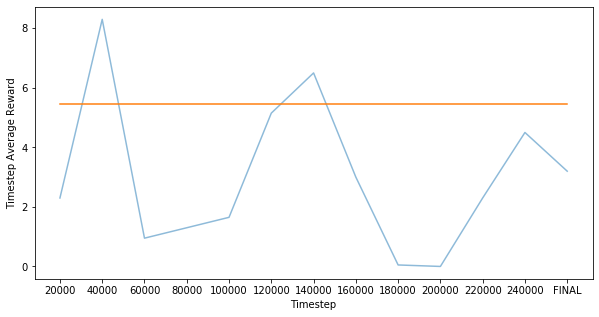

In [12]:
# plot rewards
#plt.plot(episode[-len(cum_r):], r_array)
plt.figure(figsize=(10,5))
plt.plot(load_array, r_array, alpha=0.5)
plt.plot(random_agent_r_array)
plt.xlabel('Timestep')
plt.ylabel('Timestep Average Reward')

Text(0, 0.5, 'Timestep Average Length')

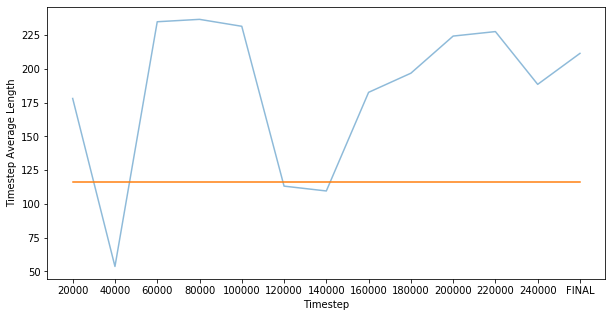

In [13]:
plt.figure(figsize=(10,5))
plt.plot(load_array, l_array, alpha=0.5)
plt.plot(random_agent_l_array)
plt.xlabel('Timestep')
plt.ylabel('Timestep Average Length')